In [1]:
import ares
import matplotlib.pyplot as plt
import numpy as np
import time

In [8]:
pf = \
    {
    'radiative_transfer':False,
    'verbose':False,
    'dark_matter_heating':True, 
    'include_cgm':False, 
    # 'initial_v_stream':0, 
    'initial_redshift':1010, 
    'include_He':True,
    'dark_matter_mass': 10
    }

V_rms = 29000 # m/s

N = 20 # number of initial_v_stream
N_z = 100

initial_v_stream_list = np.random.normal(0, V_rms, N)
initial_v_stream_list = abs(initial_v_stream_list)
sim_dict = {initial_v_stream:0 for initial_v_stream in initial_v_stream_list}

z_array = np.linspace(6, 300, N_z)
dTb_dict = {initial_v_stream:0 for initial_v_stream in initial_v_stream_list}

default = ares.simulations.Global21cm(verbose=False, radiative_transfer=False)
default.run()

In [9]:
start_time = time.time()

for i, initial_v_stream in enumerate(initial_v_stream_list):
    print("initial_v_stream =", initial_v_stream, 'm/s.')
    sim_dict[initial_v_stream] = ares.simulations.Global21cm(initial_v_stream = initial_v_stream, **pf)
    sim = sim_dict[initial_v_stream]
    sim.run()
    
    dTb_dict[initial_v_stream] = np.interp(z_array, sim.history['z'][::-1], sim.history['dTb'][::-1])
    # sim_dict[initial_v_stream].save()

end_time = time.time()
time_elapse = end_time - start_time
print("It costs {} seconds to average {} different initial_v_stream.".format(time_elapse, N))

initial_v_stream = 34819.38946131038 m/s.
initial_v_stream = 5562.616507046263 m/s.
initial_v_stream = 38919.09468749572 m/s.
initial_v_stream = 3707.722515578707 m/s.
initial_v_stream = 54996.267961341575 m/s.
initial_v_stream = 44193.320727733226 m/s.
initial_v_stream = 351.73609674484715 m/s.
initial_v_stream = 38964.959978549465 m/s.
initial_v_stream = 9763.965854163642 m/s.
initial_v_stream = 3972.032673075867 m/s.
initial_v_stream = 15569.877593356821 m/s.
initial_v_stream = 57949.85570863307 m/s.
initial_v_stream = 24848.282550145195 m/s.
initial_v_stream = 7361.559373621594 m/s.
initial_v_stream = 49038.449539911846 m/s.
initial_v_stream = 8446.659776225302 m/s.
initial_v_stream = 9514.119816786731 m/s.
initial_v_stream = 3349.260426903111 m/s.
initial_v_stream = 67509.01623917087 m/s.
initial_v_stream = 79361.16953798383 m/s.
It costs 81.52741861343384 seconds to average 20 different initial_v_stream.


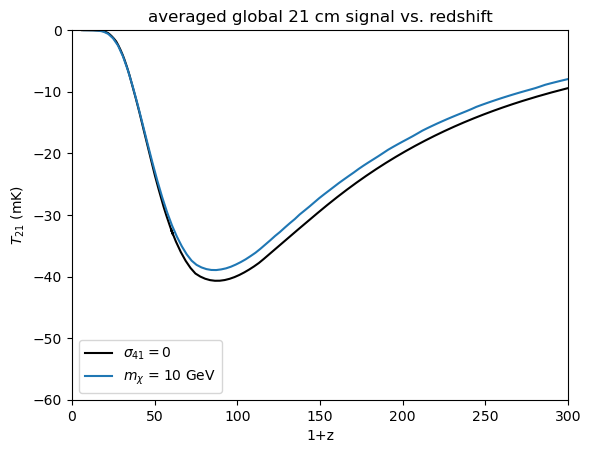

In [14]:
dTb_average = np.average(list(dTb_dict.values()), axis=0)

plt.plot(1+default.history['z'], default.history['dTb'], c='k', linestyle='-', label='$\sigma_{41} = 0$')
plt.plot(1+z_array, dTb_average, label=r'$m_{\chi}$ '+'= {} GeV'.format(sim.pf['dark_matter_mass']))#, label=r'DM, $V{\chi b,0}=$'+'{:.0f}m/s'.format(sim.pf['initial_v_stream']))

plt.title("averaged global 21 cm signal vs. redshift")
plt.xlabel("1+z")
plt.ylabel(r"$T_{21}$ (mK)")
plt.xlim(0, 300)
plt.ylim(-60, 0)
plt.legend()
plt.show()

In [11]:
# for initial_v_stream in initial_v_stream_list:
#     sim = sim_dict[initial_v_stream]
#     plt.plot(1+sim.history['z'], sim.history['dTb'], label=r'DM, $V{\chi b,0}=$'+'{:.0f}m/s'.format(sim.pf['initial_v_stream']))
# plt.title("global 21 cm signal vs. redshift")
# plt.xlabel("z")
# plt.ylabel(r"$T_{21}$ (mK)")
# plt.xlim(0, 300)
# plt.ylim(-60, 0)
# plt.legend()
# plt.show()

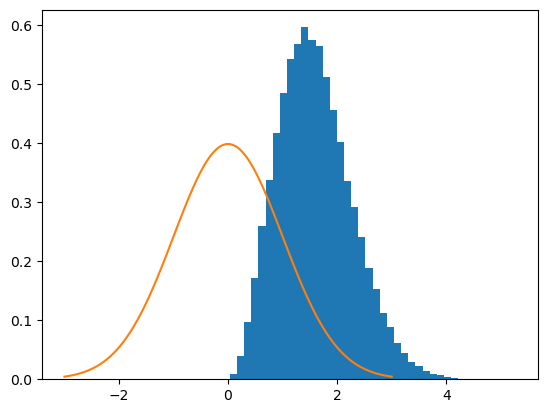

In [12]:
# test 3D gaussian

def gaussian(x):
    y = 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)
    return y

x = np.random.normal(0,1,1000*N_z)
y = np.random.normal(0,1,1000*N_z)
z = np.random.normal(0,1,1000*N_z)

r = np.sqrt(x*x + y*y + z*z)

plt.hist(r, bins=40, density=True)
r = np.linspace(-3,3,100)
plt.plot(r, gaussian(r))